**Business Problem**

- Create a predictive model that can help predict a species of a penguin based on physical attributes,
  then we can use that model to help researchers classify penguins in the field, instead of needing an
  experiened bialogist.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\penguins_size.csv')
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Data Preprocessing**

**EDA**

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [6]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [7]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [9]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [10]:
continuous = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']

discrete_categorical = ['species', 'island', 'sex']

In [11]:
df.describe(include = 'all')

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      344     344        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
top     Adelie  Biscoe               NaN              NaN                NaN   
freq       152     168               NaN              NaN                NaN   
mean       NaN     NaN         43.921930        17.151170         200.915205   
std        NaN     NaN          5.459584         1.974793          14.061714   
min        NaN     NaN         32.100000        13.100000         172.000000   
25%        NaN     NaN         39.225000        15.600000         190.000000   
50%        NaN     NaN         44.450000        17.300000         197.000000   
75%        NaN     NaN         48.500000        18.700000         213.000000   
max        NaN     NaN         59.600000        21.500000         231.000000   

        body_mass_g   sex  
count    342.000000   334  
unique          NaN     3  
top             NaN  MALE  
freq            NaN   168  
mean    4201.754386   NaN  
std      801.954536   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4750.000000   NaN  
max     6300.000000   NaN

In [12]:
df[continuous].describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [21]:
df[discrete_categorical].describe()

species  island   sex
count      344     344   344
unique       3       3     2
top     Adelie  Biscoe  MALE
freq       152     168   179

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

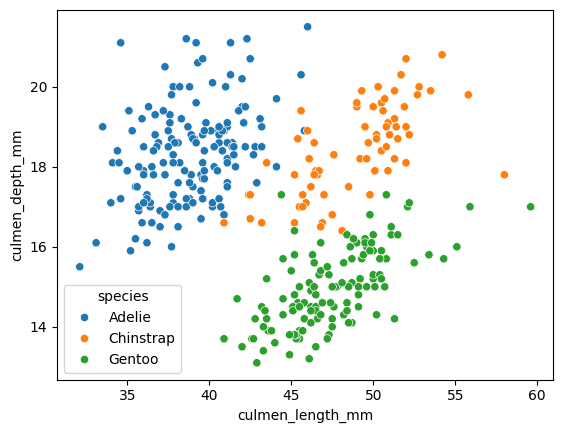

In [14]:
sns.scatterplot(x = 'culmen_length_mm',y = 'culmen_depth_mm',data = df,hue = 'species')

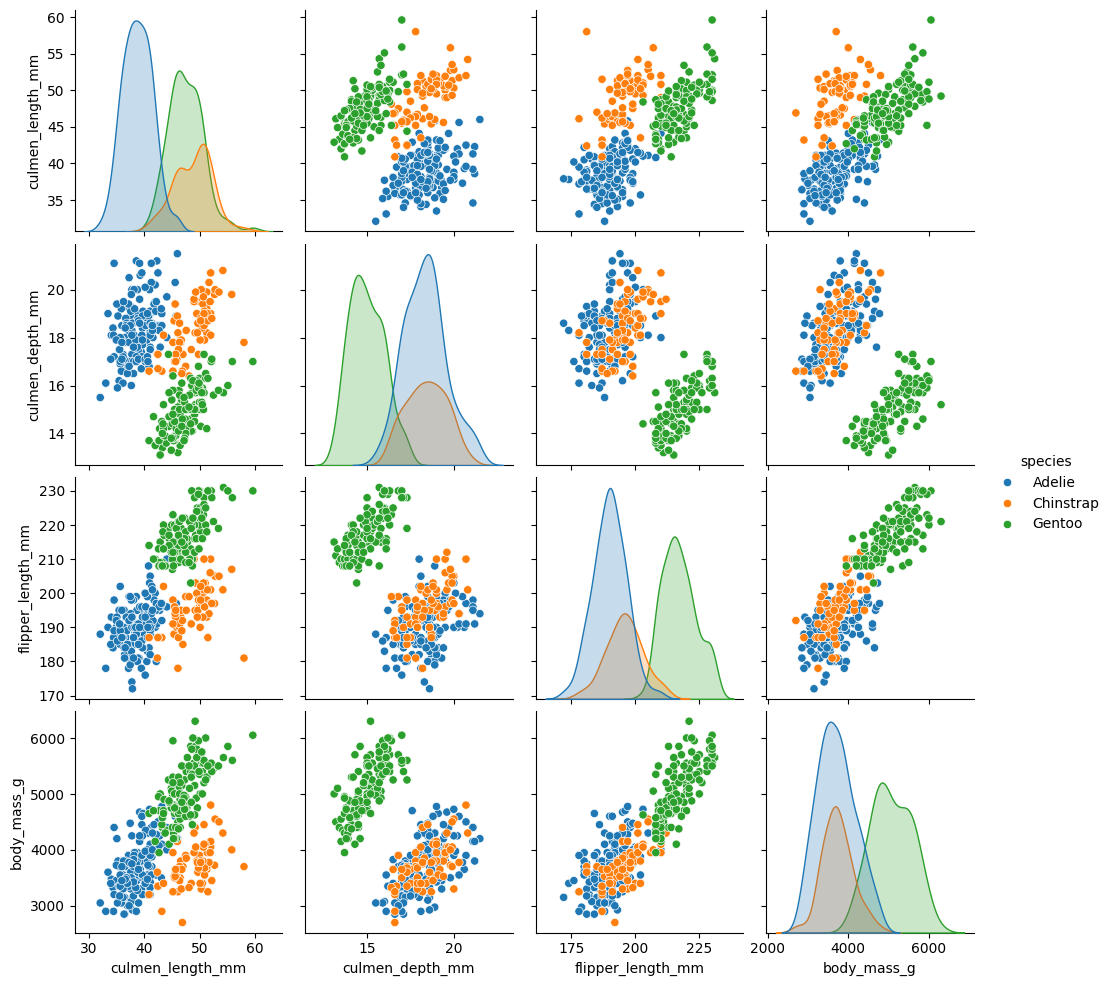

In [15]:
sns.pairplot(df,hue = 'species')
plt.show()

**Data Cleaning**

In [16]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [17]:
df['sex'].replace('.','MALE',inplace = True)

In [18]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [19]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace = True)

df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace = True)

df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace = True)

df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace = True)

df['sex'].fillna(df['sex'].mode()[0],inplace = True)


In [20]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Encoding**

In [22]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first = True)
y = df['species']
X

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0            39.10000         18.70000         181.000000  3750.000000   
1            39.50000         17.40000         186.000000  3800.000000   
2            40.30000         18.00000         195.000000  3250.000000   
3            43.92193         17.15117         200.915205  4201.754386   
4            36.70000         19.30000         193.000000  3450.000000   
..                ...              ...                ...          ...   
339          43.92193         17.15117         200.915205  4201.754386   
340          46.80000         14.30000         215.000000  4850.000000   
341          50.40000         15.70000         222.000000  5750.000000   
342          45.20000         14.80000         212.000000  5200.000000   
343          49.90000         16.10000         213.000000  5400.000000   

     island_Dream  island_Torgersen  sex_MALE  
0           False              True      True  
1           False              True     False  
2           False              True     False  
3           False              True      True  
4           False              True     False  
..            ...               ...       ...  
339         False             False      True  
340         False             False     False  
341         False             False      True  
342         False             False     False  
343         False             False      True  

[344 rows x 7 columns]

**Train/Test Split**

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =6)

**Modelling & Evaluation**

**Decision Tree Classifier - with default Hyperparameters**

In [28]:
# Modelling 
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = 0)
dt_default.fit(X_train,y_train)

# Prediction 
pred_train = dt_default.predict(X_train)
base_pred = dt_default.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y_trian,pred_train))
print('Test Accuracy:',accuracy_score(y_test,base_pred))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(dt_default,X_train,y_train,cv = 5,scoring = 'accuracy').mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
Cross Validation Score: 0.9636363636363635


**Visualize the Tree**

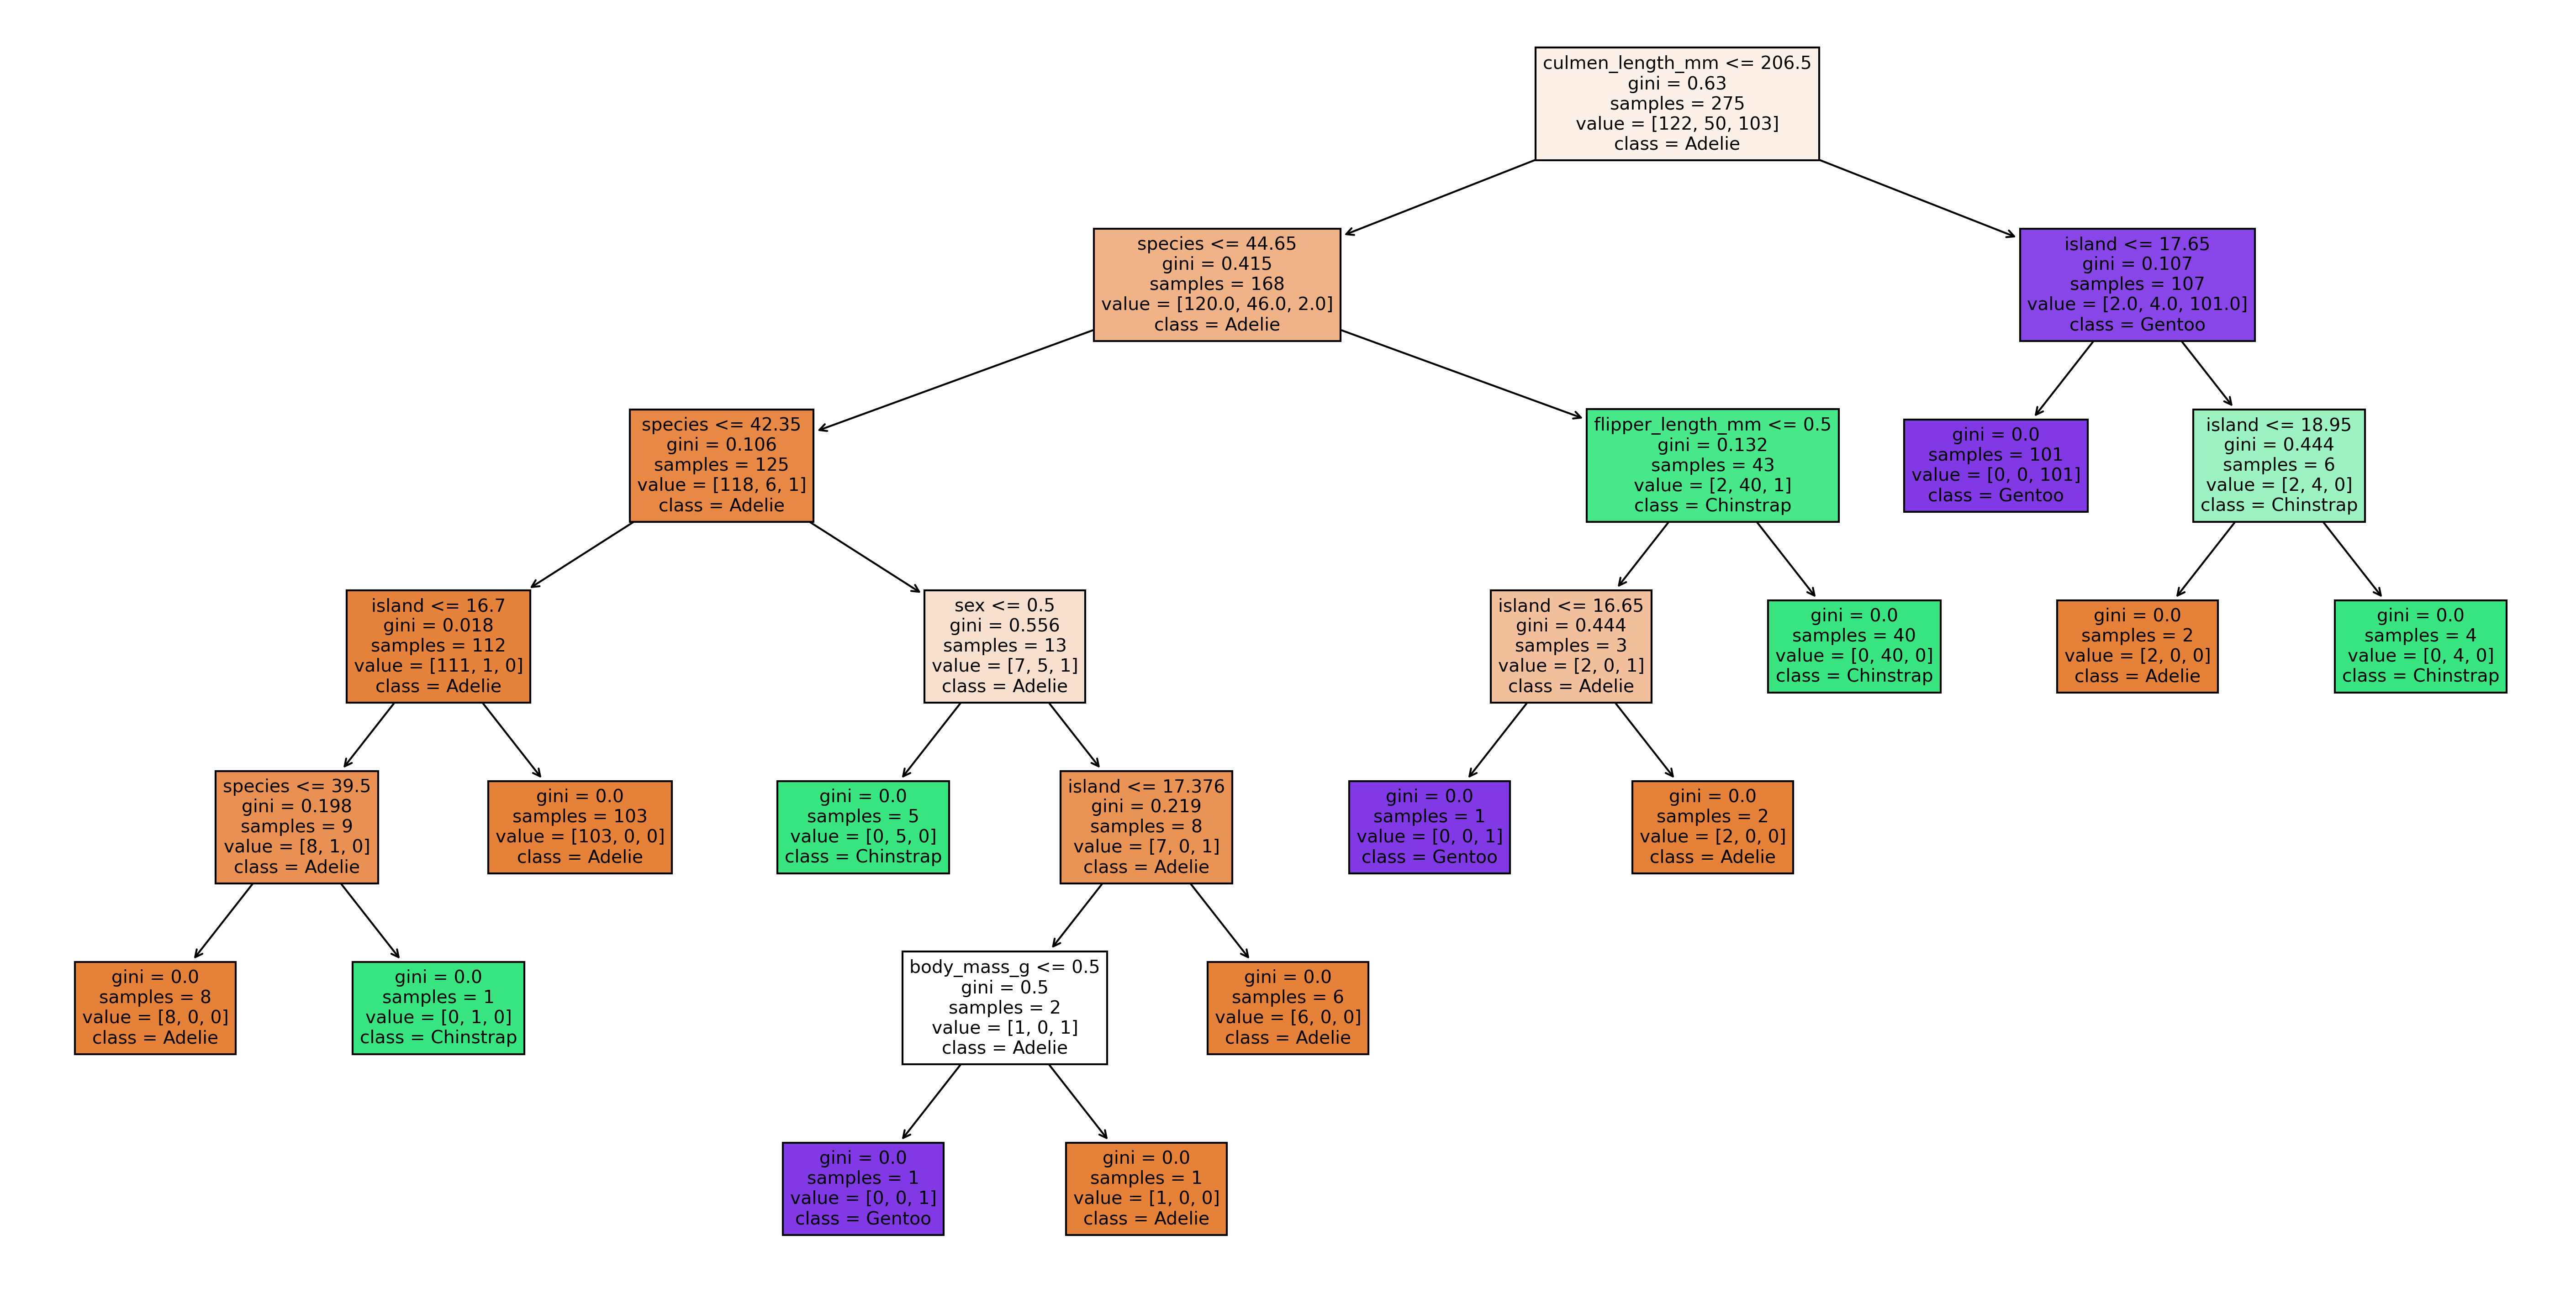

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize = (24,12),dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names =['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
          class_names = ['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

**HyperParameter Tunning**

In [41]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state =0)

# parameters (which you want to tune and identify the best)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5
                         ]}
grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv =5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 45}

**Importance of each feature given by this model**

In [42]:
grid.best_estimator_.feature_importances_

array([0.32652852, 0.07946741, 0.53152486, 0.        , 0.02506295,
       0.00577343, 0.03164284])

In [51]:
feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                    index = X.columns
                    ,columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance']>0]

important_features_list = feats_imp.index.to_list()
important_features_list 

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'island_Dream',
 'island_Torgersen',
 'sex_MALE']

**Final Decision Tree Model**

**with best hyper parameters & with importance features**

In [54]:
# input with important feature
X_imp = X[important_features_list]

# train-test-split
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size = 0.2,random_state = 6)

# Model with best hyperparameters 
final_dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth =5,random_state =0)
final_dt_model.fit(X_train,y_train)
ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluatino 
print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print('Cross validation score:',cross_val_score(final_dt_model,X_train,y_train,cv = 5,scoring = 'accuracy').mean())

Train Accuracy: 0.9963636363636363
Test Accuracy: 1.0
Cross validation score: 0.96


In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)